# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [457]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Regression Model Evaluation

In [458]:
from sklearn.datasets import load_boston

data_boston = load_boston()

X = pd.DataFrame(data_boston["data"], columns=data_boston["feature_names"])
y = pd.DataFrame(data_boston["target"], columns=['MEDV'])

data_boston = pd.concat([X, y], axis=1)

In [459]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [460]:
from sklearn.model_selection import train_test_split

In [461]:
X = data_boston.loc[:, data_boston.columns != 'MEDV']
y = data_boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [462]:
from sklearn.linear_model import LinearRegression

In [463]:
houses_model = LinearRegression()

houses_model.fit(X_train, y_train)

print(houses_model.intercept_)
print()
print(houses_model.coef_)

33.34792665865261

[-1.19969298e-01  4.38863135e-02 -3.10181639e-02  3.35114194e+00
 -1.43507390e+01  4.29614496e+00 -2.01819541e-02 -1.52756103e+00
  2.50427101e-01 -1.03168736e-02 -9.57800429e-01  7.25868902e-03
 -4.60084684e-01]


In [464]:
y_train_pred = houses_model.predict(X_train)

y_test_pred = houses_model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [465]:
from sklearn.metrics import r2_score

In [466]:
r_score_train = r2_score(y_train, y_train_pred)

r_score_test = r2_score(y_test, y_test_pred)

In [467]:
print(f'R-squared for training set: {r_score_train}\n\nR-squared for testing set: {r_score_test}')

R-squared for training set: 0.7646253637596058

R-squared for testing set: 0.6228757644268872


## 4. Calculate and print mean squared error for both the training and the testing set.

In [468]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [469]:
mse_train = mean_squared_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

In [470]:
print(f'MSE for training set: {mse_train}\n\nMSE for testing set: {mse_test}')

MSE for training set: 19.88633143314164

MSE for testing set: 31.422829724288633


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [471]:
mae_train = mean_absolute_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)

In [472]:
print(f'MAE for training set: {mae_train}\n\nMAE for testing set: {mae_test}')

MAE for training set: 3.1541655627094425

MAE for testing set: 3.700720532641544


## Classification Model Evaluation

In [473]:
from sklearn.datasets import load_iris

data_iris = load_iris()

X = pd.DataFrame(data_iris["data"], columns=data_iris["feature_names"])
y = pd.DataFrame(data_iris["target"], columns=["class"])

data_iris = pd.concat([X, y], axis=1)

In [474]:
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [475]:
X_iris = data_iris.loc[:, data_iris.columns != 'class']
y_iris = data_iris['class']

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.20)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [476]:
from sklearn.linear_model import LogisticRegression

In [477]:
iris_model = LogisticRegression()

iris_model.fit(X_train, y_train)

print(iris_model.intercept_)
print()
print(iris_model.coef_)

[ 10.52140333   1.56234894 -12.08375227]

[[-0.55958805  0.79803858 -2.3750078  -0.95317992]
 [ 0.51725422 -0.15879268 -0.22115357 -0.85741479]
 [ 0.04233383 -0.6392459   2.59616137  1.81059472]]


In [478]:
y_train_pred = iris_model.predict(X_train)

y_test_pred = iris_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [479]:
from sklearn.metrics import accuracy_score

In [480]:
acc_score_train = accuracy_score(y_train, y_train_pred)

acc_score_test = accuracy_score(y_test, y_test_pred)

In [481]:
print(f'Accuracy score for training set: {acc_score_train}\n\nAccuracy score for testing set: {acc_score_test}')

Accuracy score for training set: 0.9833333333333333

Accuracy score for testing set: 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [482]:
from sklearn.metrics import balanced_accuracy_score

In [483]:
bal_score_train = balanced_accuracy_score(y_train, y_train_pred)

bal_score_test = balanced_accuracy_score(y_test, y_test_pred)

In [484]:
print(f'Balanced acc. score for training set: {bal_score_train}\n\nBalanced acc. score for testing set: {bal_score_test}')

Balanced acc. score for training set: 0.9824561403508771

Balanced acc. score for testing set: 0.9722222222222222


## 10. Calculate and print the precision score for both the training and the testing set.

In [485]:
from sklearn.metrics import precision_score

In [486]:
prec_score_train = precision_score(y_train, y_train_pred, average='micro')

prec_score_test = precision_score(y_test, y_test_pred, average='micro')

In [487]:
print(f'Precision score for training set: {prec_score_train}\n\nPrecision score for testing set: {prec_score_test}')

Precision score for training set: 0.9833333333333333

Precision score for testing set: 0.9666666666666667


## 11. Calculate and print the recall score for both the training and the testing set.

In [488]:
from sklearn.metrics import recall_score

In [489]:
recall_score_train = recall_score(y_train, y_train_pred, average='micro')

recall_score_test = recall_score(y_test, y_test_pred, average='micro')

In [490]:
print(f'Recall score for training set: {recall_score_train}\n\nRecall score for testing set: {recall_score_test}')

Recall score for training set: 0.9833333333333333

Recall score for testing set: 0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [491]:
from sklearn.metrics import f1_score

In [492]:
f1_score_train = f1_score(y_train, y_train_pred, average='micro')

f1_score_test = f1_score(y_test, y_test_pred, average='micro')

In [493]:
print(f'F1 score for training set: {f1_score_train}\n\nF1 score for testing set: {f1_score_test}')

F1 score for training set: 0.9833333333333333

F1 score for testing set: 0.9666666666666667


## 13. Generate confusion matrices for both the training and the testing set.

In [494]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [495]:
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [496]:
print(f'Confusion matrix for training set:\n{conf_matrix_train}')

Confusion matrix for training set:
[[38  0  0]
 [ 0 36  2]
 [ 0  0 44]]


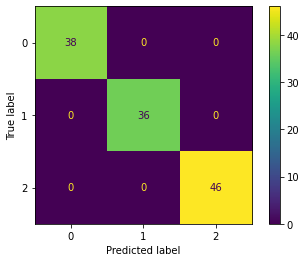

In [497]:
plot_confusion_matrix(iris_model, X_train, y_train_pred);

In [498]:
print(f'Confusion matrix for testing set:\n{conf_matrix_test}')

Confusion matrix for testing set:
[[12  0  0]
 [ 0 11  1]
 [ 0  0  6]]


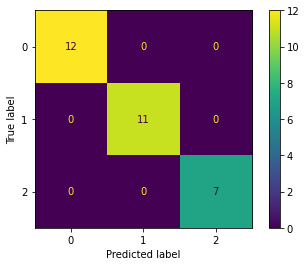

In [499]:
plot_confusion_matrix(iris_model, X_test, y_test_pred);

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [500]:
from sklearn.neighbors import KNeighborsRegressor

In [511]:
X_iris = data_iris.loc[:, data_iris.columns != 'class']
y_iris = data_iris['class']

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.20)

In [512]:
knn_fit = KNeighborsRegressor(n_neighbors=10)
knn_fit.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [513]:
y_train_pred = knn_fit.predict(X_train)

y_test_pred = knn_fit.predict(X_test)

In [514]:
mse_train_bonus = mean_squared_error(y_train, y_train_pred)

mse_test_bonus = mean_squared_error(y_test, y_test_pred)

In [515]:
print(f'MSE for training set: {mse_train_bonus}\n\nMSE score for testing set: {mse_test_bonus}')

MSE for training set: 0.02175

MSE score for testing set: 0.020333333333333335


In [516]:
import catboost as cat

In [517]:
cat_fit = cat.CatBoostRegressor(iterations=20000, depth=3, od_type="Iter", od_wait=500)
cat_fit.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.005871
0:	learn: 0.8178039	test: 0.7923491	best: 0.7923491 (0)	total: 441us	remaining: 8.83s
1:	learn: 0.8138891	test: 0.7882770	best: 0.7882770 (1)	total: 908us	remaining: 9.09s
2:	learn: 0.8098740	test: 0.7842873	best: 0.7842873 (2)	total: 1.14ms	remaining: 7.62s
3:	learn: 0.8064655	test: 0.7810033	best: 0.7810033 (3)	total: 1.85ms	remaining: 9.24s
4:	learn: 0.8026054	test: 0.7774857	best: 0.7774857 (4)	total: 2.1ms	remaining: 8.41s
5:	learn: 0.7993027	test: 0.7742084	best: 0.7742084 (5)	total: 2.35ms	remaining: 7.84s
6:	learn: 0.7953774	test: 0.7704449	best: 0.7704449 (6)	total: 3.46ms	remaining: 9.88s
7:	learn: 0.7918976	test: 0.7670261	best: 0.7670261 (7)	total: 3.89ms	remaining: 9.71s
8:	learn: 0.7878941	test: 0.7631122	best: 0.7631122 (8)	total: 4.34ms	remaining: 9.65s
9:	learn: 0.7840240	test: 0.7594684	best: 0.7594684 (9)	total: 4.75ms	remaining: 9.49s
10:	learn: 0.7808391	test: 0.7563510	best: 0.7563510 (10)	total: 5.14ms	remaining: 9.34s
11:	learn: 0.7

In [518]:
y_train_pred = cat_fit.predict(X_train)

y_test_pred = cat_fit.predict(X_test)

In [519]:
mean_squared_error(y_train, y_train_pred)

0.0068820151285319785

In [520]:
mean_squared_error(y_test, y_test_pred)

0.0343317355415302